<img src = "https://drive.google.com/uc?export=view&id=1FSCcyEY8_AsxSOTiv88txhmxbUwfLw_P" alt = "Encabezado MLDS" width = "100%">  </img>

# **Librería de datos geoespaciales: *Geopandas***
---
<img src="https://geopandas.org/_static/geopandas_logo_web.svg" alt="scipy" width="85%">

***GeoPandas*** es una librería de *Python* diseñada para el manejo de datos **[geoespaciales](https://es.wikipedia.org/wiki/Topolog%C3%ADa_geoespacial)** basada en la librería de análisis de datos *Pandas* y construida a partir de la librería de análisis y manipulación de objetos geométricos [*Shapely*](https://shapely.readthedocs.io/en/stable/project.html). *GeoPandas* implementa dos tipos de datos derivados de **`pandas.Series`** y **`pandas.DataFrame`** llamados **`GeoSeries`** y **`GeoDataFrame`**, respectivamente. Las operaciones geométricas soportadas por ***Geopandas*** están basadas en el sistema de coordenadas cartesianas.

## **0. Instalar e importar *GeoPandas***
---
En el momento de realización de este material, *GeoPandas* no es parte de la lista de librerías por defecto de *Google Colaboratory*. Para utilizar su funcionalidad deberemos instalar los paquetes necesarios. Primero, instalaremos *GeoPandas*.

In [1]:
# Librería de datos geoespaciales GeoPandas.
!pip install -U geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/27/27/2687abaa2ac02b5814e2929a5033da1e5d132c19a904dc56f77f63fd6eb9/geopandas-0.14.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.1 MB 325.1 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.1 MB 563.7 kB/s eta 0:00:02
   ------------ --------------------------- 0.3/1.1 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 5.4 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2


Los demás paquetes son dependencias necesarias para llevar a cabo algunas operaciones de combinación de datos geoespaciales con *GeoPandas*. En particular, la función **`GeoPandas.sjoin`** que se verá más adelante en este material.

La instalación de estas dependencias se puede hacer fácilmente con las siguientes instrucciones de línea de comandos:

In [2]:
!pip install -U rtree mapclassify fiona pyproj
!sudo apt install libspatialindex-dev

  Obtaining dependency information for pyproj from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/6.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.1 MB 660.6 kB/s eta 0:00:10
   - -------------------------------------- 0.2/6.1 MB 2.5 MB/s eta 0:00:03
   ---- ----------------------------------- 0.7/6.1 MB 5.4 MB/s eta 0:00:01
   ---------- ----------------------------- 1.6/6.1 MB 9.5 MB/s eta 0:00:01
   ------------------------------------ --- 5.5/6.1 MB 25.1 MB/s eta 0:00:01
   ---------------------------------------- 6.1/6.1 MB 24.3 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.6.0
    Uninstalling pyproj-3.6.0:
      Successfully uninstalled pyproj-3.6.0


"sudo" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Antes de empezar, vamos a importar las librerías habituales de análisis de datos *NumPy*, *Matplotlib* y *Pandas*.

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 110

Finalmente, importamos el módulo **`geopandas`** para manejo de datos georeferenciados, usando el alias **`gpd`**; y también **`shapely`** y su submódulo **`shapely.geometry`** para la manipulación de figuras geométricas.

In [4]:
import geopandas as gpd         # Librería de datos geoespaciales GeoPandas.
import shapely                  # Librería de manipulación de objetos geométricos.
from shapely.geometry import *  # Herramientas para manipulación geométrica.

Para conocer las versiones de todas las librerías ejecute la siguiente celda:


In [5]:
# Versiones de Python y demás liberías utilizadas.
!python --version
print('GeoPandas', gpd.__version__)
print('Shapely', shapely.__version__)
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)

Python 3.11.5
GeoPandas 0.14.0
Shapely 2.0.1
NumPy 1.25.2
Pandas 2.0.3
Matplotlib 3.7.2


Este material se realizó con las siguientes versiones:
- Python 3.10.6
- GeoPandas 0.13.2
- NumPy 1.22.4
- Pandas 1.5.3
- Matplotlib 3.7.1


## **1. Tipo de dato: *GeoSeries***
---

Un objeto **`GeoSeries`** es básicamente un objeto *Series* cuyos valores contienen objetos de tipos geométricos. Cada valor almacenado en una *GeoSerie* puede tener un único objeto geométrico (un polígono, por ejemplo) o múltiples objetos geométricos, los cuales por lo general deben ser del mismo tipo.

**`Geopandas`** soporta los siguientes tipos de objetos geométricos:

- **`Points`** | **`Multi-Points`** : Puntos.
- **`Lines`** | **`Multi-Lines`**: Líneas.
- **`Polygons`** | **`Multi-Polygons`**: Polígonos.

Cada uno de estos objetos son a su vez objetos de la librería **[`shapely`](https://shapely.readthedocs.io/en/latest/manual.html#geometric-objects)**.



### **1.1. Entendiendo las GeoSeries**
---

Para entender el funcionamiento de una *geoserie*, lo ilustraremos inicialmente mediante un ejemplo básico. Definimos una figura geométrica **`p1`** del tipo **`Polygon`**, la cual es definida mediante la serie de puntos (tuplas con dos números reales) en el plano cartesiano que dan forma al polígono. Después, se define la *geoserie* enviando en este caso un único parámetro, el cual es el objeto o figura que deseamos dibujar.

Para este ejemplo usaremos el siguiente polígono:

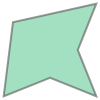

In [6]:
# Creación del objeto Polygon.
p1 = Polygon([(0, 0),(0.5, 0.2), (1, 0), (0.8, 0.5), (1, 1), (0.1, 0.8)])

p1

In [7]:
# Creación del objeto GeoSeries
g = gpd.GeoSeries(p1)
g

0    POLYGON ((0.00000 0.00000, 0.50000 0.20000, 1....
dtype: geometry

Observe en el resultado de la celda anterior que el **`dtype`** de la *geoserie* es de tipo **`geometry`**.

Una vez definida la *geoserie* (**`g`**), podemos dibujarla con el llamado a la función **`plot()`**, la cual nos dibujará el polígono con el que se definió la *geoserie* (usando *Matplotlib*).

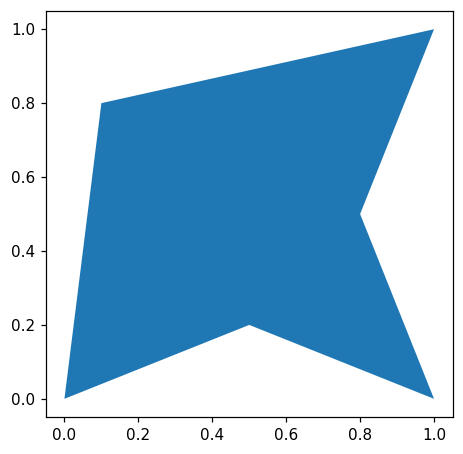

In [8]:
g.plot();

Ahora vamos a definir la *geoserie* con más de un objeto geométrico. En el siguiente caso definimos tres objetos geométricos de tipo **poligonal** y con ellos creamos la **geoserie** que posteriormente se diagrama con el método **`plot`**.

La función **`plot`** puede recibir parámetros para la personalización de la gráfica. En este caso por ejemplo definimos el mapa de colores a usar:

In [9]:
p1 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])      # Cuadrado azul
p2 = Polygon([(0, 0), (1, 0), (1, 1)])              # Triángulo gris encima del cuadrado p1
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])      # Cuadrado rojo


# Creamos el objeto GeoSeries con 3 polígonos.
g = gpd.GeoSeries([p1, p2, p3])

g

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
dtype: geometry

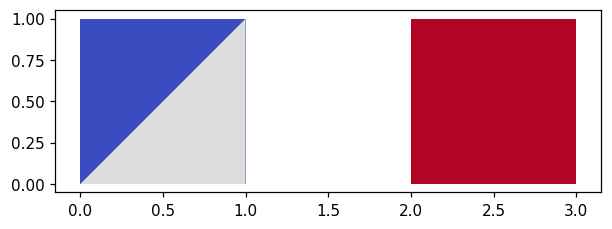

In [10]:
# Graficamos el resultado con el método "plot".
g.plot(cmap='coolwarm');

> **Nota**: De esta manera, es posible diagramar mapas de una región geográfica,  definiendo el polígono o conjunto de polígonos que le dan forma a cada región. Más adelante veremos varios ejemplos.

### **1.2. Atributos**
---
Las ***geoseries*** poseen ciertos atributos que permiten conocer sus características. Entre ellos se encuentran los atributos heredados de la clase **`pandas.Series`**, incluyendo aquellos que permiten el indexado y selección de datos.


In [11]:
# Objeto Index de una geoserie
g.index

RangeIndex(start=0, stop=3, step=1)

In [12]:
# Objeto numpy.array con los valores de una geoserie.
g.values

<GeometryArray>
[<POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))>,      <POLYGON ((0 0, 1 0, 1 1, 0 0))>,
 <POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))>]
Length: 3, dtype: geometry

In [13]:
# Objetos shape y size para obtener las dimensiones del conjunto.
print(g.shape)
print(g.size)

(3,)
3


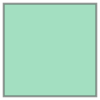

In [14]:
# Objeto de acceso por etiqueta 'loc'.
g.loc[0]

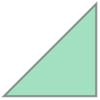

In [15]:
# Objeto de acceso por posición 'iloc'.
g.iloc[-2]

La manipulación de estos objetos es muy similar a aquella realizada entre objetos de *Pandas*, y además de los atributos básicos se pueden emplear funciones más avanzadas como **`apply`** y **`to_csv`**, entre otras.

*GeoPandas* amplía esta colección de atributos y funciones con utilidades geométricas. Algunos de los atributos exclusivos de los objetos *GeoSeries* son:

* **`area`**: Retorna el área proyectada de cada una de las figuras de la *geoserie*. Con la siguiente instrucción obtenemos el área de las tres figuras que conforman la *geoserie* **`g`**.


In [16]:
g.area

0    1.0
1    0.5
2    1.0
dtype: float64

* **`bounds`**: Define los límites (valor mínimo y máximo) de los ejes del plano cartesiano en los cuales se dibuja cada figura de la *geoserie* y lo retorna en un objeto *DataFrame* de *Pandas*:

In [17]:
g.bounds

,minx,miny,maxx,maxy
0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0
2,2.0,0.0,3.0,1.0


* **`boundary`**: Retorna los límites de cada objeto geométrico en forma de línea **`LineString`** compuesta por una colección de puntos.

In [18]:
g.boundary

0    LINESTRING (0.00000 0.00000, 1.00000 0.00000, ...
1    LINESTRING (0.00000 0.00000, 1.00000 0.00000, ...
2    LINESTRING (2.00000 0.00000, 3.00000 0.00000, ...
dtype: geometry

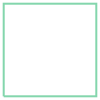

In [19]:
# Límite del primer objeto. (Esta geometría es la línea en el perímetro del polígono original)
g.boundary[0]

* **`geom_type`**: Corresponde al tipo de figura geométrica de cada uno de los objetos que componen la *geoserie*. En este caso este tipo de dato es **`Polygon`**:


In [20]:
g.geom_type

0    Polygon
1    Polygon
2    Polygon
dtype: object

* **`centroid`**: Retorna las coordenadas del **[centroide](https://es.wikipedia.org/wiki/Centroide)** de cada figura.

In [21]:
g.centroid

0    POINT (0.50000 0.50000)
1    POINT (0.66667 0.33333)
2    POINT (2.50000 0.50000)
dtype: geometry

Podemos dibujar en el plano cartesiano el centroide **`centroid`** de cada figura geométrica que conforma la *geoserie* usando el método **`plot`** en el objeto *GeoSeries* generado:

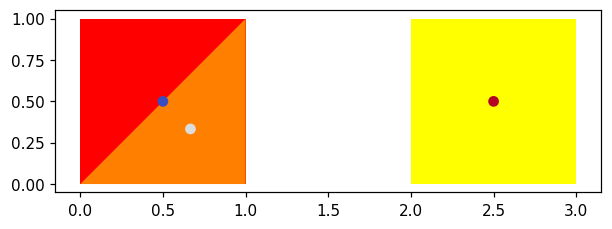

In [22]:
ax = g.plot(cmap='autumn')                 # Primero se dibujan los polígonos de la geoserie.
g.centroid.plot(ax = ax, cmap='coolwarm'); # Segundo, se dibujan sus centroides usando el mismo objeto Axes (ax).

* **`convex_hull`**: Retorna las coordenadas del polígono que representa la [**envolvente conexa o *convex hull***](https://es.wikipedia.org/wiki/Envolvente_convexa) de cada figura.

In [23]:
g.convex_hull

0    POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 1.00000, 1....
2    POLYGON ((2.00000 0.00000, 2.00000 1.00000, 3....
dtype: geometry

* **`envelope`**: Retorna las coordenadas del polígono rectangular de menor tamaño que contenga dentro de su geometría cada figura.

In [24]:
g.envelope

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
dtype: geometry

* **`unary_union`**: Retorna las coordenadas del polígono obtenido de la unión de la geometría de cada valor de la serie.

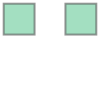

In [25]:
g.unary_union

### **1.3. Métodos básicos**
---

Los objetos **`GeoSeries`** cuentan con múltiples métodos con funcionalidades geométricas básicas. Algunos de los más importantes son:

* **`distance`**: Retorna la distancia mínima entre dos elementos geométricos. Para esto se usa la notación **`obj1.distance(obj2)`**, siendo **`obj1`** y **`obj2`** objetos de *Shapely*. El siguiente ejemplo retorna la distancia mínima que hay entre los polígonos **`p1`** y **`p3`**:

In [26]:
# Distancia entre elementos geométricos
p1.distance(p3)

1.0

  El método **`distance`** también se puede llamar desde la *geoserie* y usando como argumento uno de sus objetos. De esta manera, nos retorna la distancia mínima desde cada uno de los objetos de la *geoserie* con respecto al objeto con el cual se llamó la función. En el siguiente ejemplo vemos la distancia mínima entre cada objeto de la *geoserie* y el objeto **`p3`**:

In [27]:
g.distance(p3)

0    1.0
1    1.0
2    0.0
dtype: float64

* **`representative_point`**: Retorna un punto representativo que se garantiza se encuentra dentro de la geometría. Esto puede llegar a ser muy útil porque muchas veces los polígonos tienen formas irregulares y su centroide es un punto que cae por fuera del polígono. En este caso, se garantiza que el punto representativo estará dentro de la geometría.

In [28]:
g.representative_point()

0    POINT (0.50000 0.50000)
1    POINT (0.75000 0.50000)
2    POINT (2.50000 0.50000)
dtype: geometry

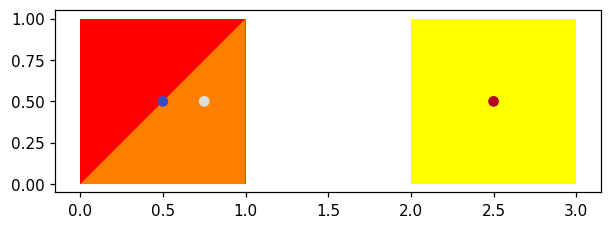

In [29]:
ax = g.plot(cmap='autumn')                               # Primero se dibujan los polígonos de la geoserie.
g.representative_point().plot(ax = ax, cmap='coolwarm'); # Segundo, se dibujan sus puntos representativos usando el mismo objeto Axes (ax).

* **`rotate`**: Genera una rotación de cada objeto geométrico con respecto a un ángulo dado como argumento **`angle`**. Este ángulo es interpretado en forma de grados, pero se puede usar en forma de radianes con el argumento booleano **`use_radians`**.

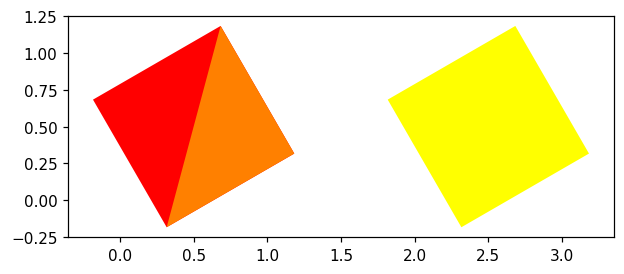

In [30]:
# Generamos una nueva serie con una rotación de 30° con respecto a la original y la graficamos.
g_rot = g.rotate(30)
g_rot.plot(cmap = 'autumn');

* **`translate`**: Genera una traslación espacial de cada objeto geométrico con respecto a los valores de desplazamiento u *offsets*, indicados con los argumentos **`xoff`**, **`yoff`** y **`zoff`**.

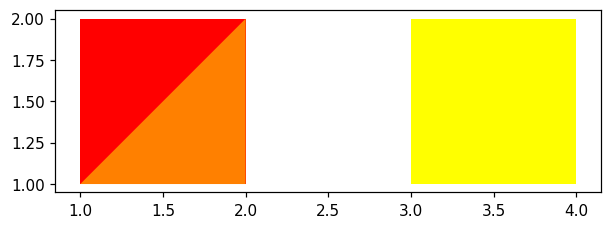

In [31]:
# Generamos una nueva serie con una traslación de 1 unidad en x y 1 unidad en y con respecto a la original y la graficamos.
g_trs = g.translate(xoff = 1,
                    yoff = 1)

g_trs.plot(cmap = 'autumn');

* **`scale`**: Genera un reescalado de cada objeto geométrico con respecto a una escala dada por cada eje, indicadas con los argumentos **`xfact`**, **`yfact`** y **`zfact`**.

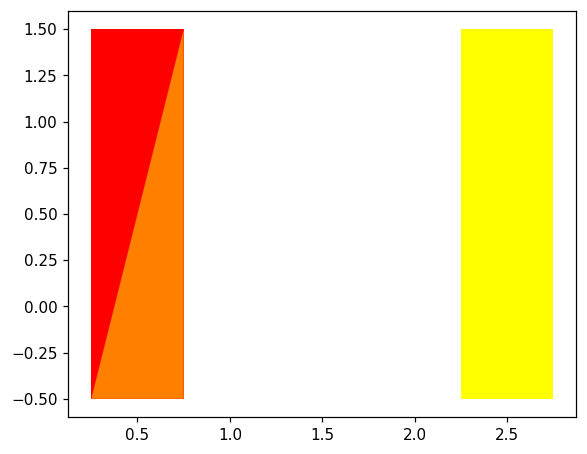

In [32]:
# Generamos una nueva serie con una reescalado de 0.5 en x y 2 en y con respecto a la original y la graficamos.
g_sca = g.scale(xfact = 0.5,
                yfact = 2)

g_sca.plot(cmap = 'autumn');

* **`buffer`**: Retorna las coordenadas del polígono que contiene todos los puntos a determinada distancia de cada objeto geométrico. Esta distancia es usada en el argumento **`distance`**.

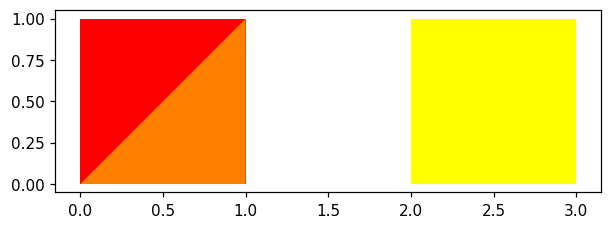

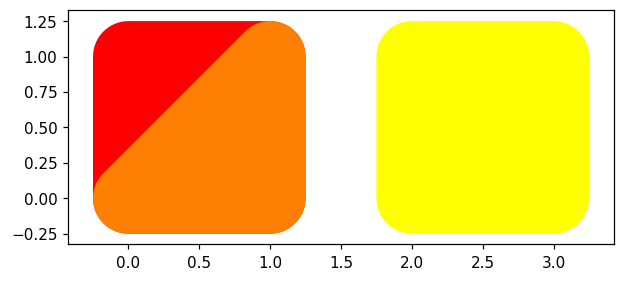

In [33]:
g_buf = g.buffer(0.25)

g.plot(cmap = 'autumn')         # Primero se dibujan los polígonos de la geoserie.
g_buf.plot(cmap = 'autumn');    # Después, se dibujan los polígonos con área extendida obtenidos con la función "buffer".

### **1.4. Pruebas de relación**
---

*GeoPandas* provee funciones especiales que permiten identificar relaciones geométricas entre varios objetos. A continuación se presentan algunas de las pruebas más importantes.

* **`geom_almost_equals`**: Es una función de la *geoserie* que recibe como parámetro un objeto geométrico y retorna **`True`** o **`False`** si hay o no igualdad geométrica aproximada entre cada uno de los objetos de la *geoserie* y el objeto enviado como parámetro. La igualdad geométrica se prueba de acuerdo a la precisión decimal especificada por el parámetro **`decimal`** (por defecto es 6 dígitos decimales). El siguiente código compara el objeto **`p3`** con cada uno de los objetos de la geoserie **`g`**:

In [34]:
g.geom_almost_equals(p3)

C:\Users\santi\AppData\Local\Temp\ipykernel_14952\4059565180.py:1: FutureWarning: The 'geom_almost_equals()' method is deprecated because the name is confusing. The 'geom_equals_exact()' method should be used instead.
  g.geom_almost_equals(p3)


0    False
1    False
2     True
dtype: bool

* **`contains`**: Retorna **`True`** si una figura está contenida en el espacio de otra. En el caso de nuestros ejemplos evaluaremos esta propiedad para los objetos **`p1`** y **`p2`**.


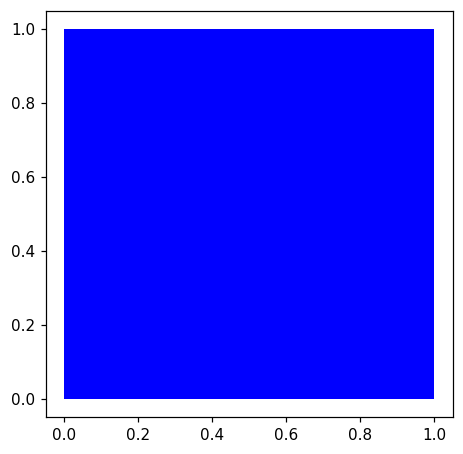

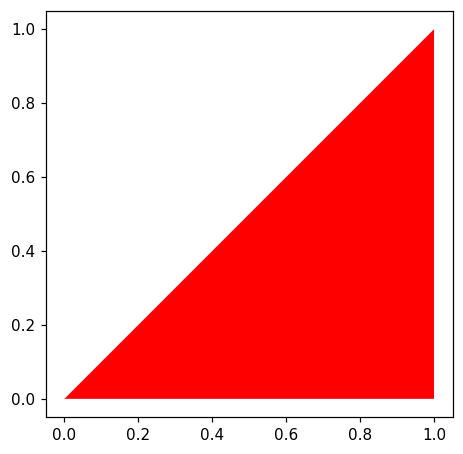

In [35]:
g[[0]].plot(color = 'blue')
g[[1]].plot(color = 'red');

In [36]:
# El objeto 1 (cuadrado azul) SÍ contiene al objeto 2 (triángulo rojo).
p1.contains(p2)

True

In [37]:
# El objeto 2 (triángulo rojo) NO contiene al objeto 1 (cuadrado azul).
p2.contains(p1)

False

In [38]:
# También se puede usar con todo un objeto GeoSeries.
g.contains(p1)

0     True
1    False
2    False
dtype: bool

* **`within`:** Devuelve verdadero si una geometría está dentro de otra. Es la operación inversa del método **`contains`**. Observe qué objeto hace el llamado para poder interpretar correctamente el resultado.

In [39]:
# El objeto 1 (cuadrado azul) NO está dentro del objeto 2 (triángulo rojo).
p1.within(p2)

False

In [40]:
# El objeto 2 (triángulo rojo) SÍ está dentro del objeto 1 (cuadrado azul).
p2.within(p1)

True

In [41]:
# También se puede usar con todo un objeto GeoSeries.
g.within(p1)

0     True
1     True
2    False
dtype: bool

* **`intersects`**: Devuelve verdadero si una figura está interceptada con otra. Es suficiente con que exista un punto que esté contenido en ambas geometrías.

In [42]:
# El único objeto que no se intercepta con p1 es el objeto p3 (cuadrado en la tercera posición).
g.intersects(p1)

0     True
1     True
2    False
dtype: bool

## **2. Tipo de dato: *GeoDataFrame***
---
Un ***GeoDataFrame*** es una estructura de datos tabular que contiene columnas de tipo geométrico. Se pueden entender fácilmente como un *DataFrame* de *pandas* donde una de sus columnas es una *GeoSerie*, es decir, contiene objetos de geometrías.  

Los *GeoDataFrames* siempre contienen una columna que se denomina geometría (**`geometry`**). Cuando una operación espacial es aplicada al *GeoDataFrame*, este comando siempre actuará sobre la columna **`geometry`**. La columna **`geometry`** podría tener un nombre diferente en ciertas ocasiones, el cual puede ser consultado usando **`gdf.geometry.name`**.

### **2.1. Entendiendo los GeoDataFrame**
---
*GeoPandas* posee algunos conjuntos de datos de ejemplo. En este caso, vamos a cargar el archivo **`naturalearth_lowres`**, con información geoespacial y demográfica de $177$ países del mundo.

Para esto usamos el método **`gpd.datasets.get_path`** y cargamos el archivo con la función **`read_file`** del módulo **`geopandas`**:

In [43]:
path = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(path)

world.head()

C:\Users\santi\AppData\Local\Temp\ipykernel_14952\1311648491.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path = gpd.datasets.get_path('naturalearth_lowres')


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [44]:
# Objeto de tipo GeoDataFrame.
type(world)

geopandas.geodataframe.GeoDataFrame

La variable **`world`**  es un **`GeoDataFrame`** que contiene datos acerca de los países del mundo. En el que la columna **`geometry`** es una *geoserie*. Los datos que contiene son:
* **`pop_est`**: Población estimada.
* **`continent`**: Continente al que pertenece el país.
* **`name`**: Nombre del país.
* **`iso_a3`**: Código ISO del país.
* **`gdp_md_est`**: Producto interno bruto (PIB) nacional estimado.
* **`geometry`**: Polígono (o multi-polígono) correspondiente al mapa de cada país.

Si llamamos a la función **`plot`** desde el objeto *GeoDataFrame*, se dibujarán todos los polígonos de la columna **`geometry`**, los cuales corresponden a los mapas de los países, en una sola figura:

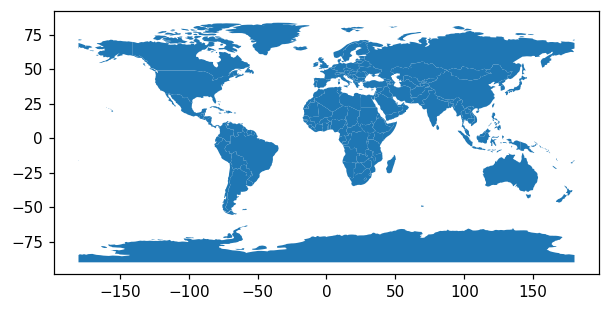

In [45]:
world.plot();

Los atributos y métodos discutidos en la sección de **`GeoSeries`** también son válidos en los objetos **`GeoDataFrame`**. Con estos datos podemos realizar acciones como, por ejemplo, generar el diagrama de los centroides de todos los países del mundo.

C:\Users\santi\AppData\Local\Temp\ipykernel_14952\1094356591.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world.centroid.plot();


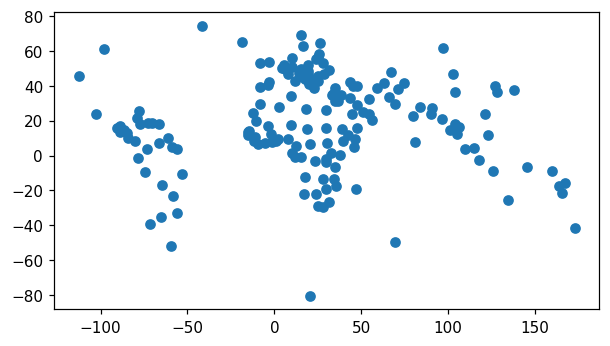

In [46]:
world.centroid.plot();

> **Nota**: El ejemplo anterior arroja un *warning* indicando que el *dataset* usado está en un sistema de coordenadas geográfico. Graficar este tipo de geometrías puede generar distorsión en la representación, por lo que se recomienda realizar una conversión del sistema de coordenadas con el método **`to_crs`**. Para más información de conversión de sistemas de referencia consulte el siguiente [enlace](https://geopandas.org/docs/user_guide/projections.html#managing-projections).

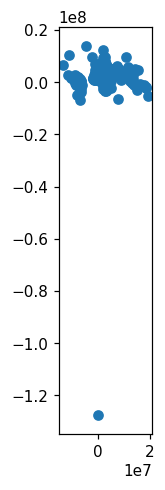

In [47]:
mercator_world = world.to_crs("EPSG:3395") # Conversión al sistema de referencia de proyección de Mercator.
mercator_world.centroid.plot();

### **2.2. Selección condicional**
---
Al igual que el objeto **`GeoSeries`**, los objetos de tipo **`GeoDataFrame`** heredan la funcionalidad de la clase **`pandas.DataFrame`**, incluyendo la posibilidad de realizar selección condicional.

Para este ejemplo vamos a hacer una selección condicional para filtrar únicamente los datos de Colombia y, posteriormente, vamos a dibujar el mapa:

In [48]:
col = world[world['name']=='Colombia']
col

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
32,50339443.0,South America,Colombia,COL,323615,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."


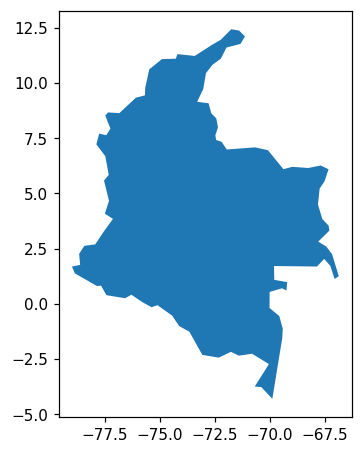

In [49]:
col.plot();

La selección condicional podría ser más compleja, por ejemplo, podríamos seleccionar a Colombia, Chile y Panamá para visualizar solamente sus mapas:

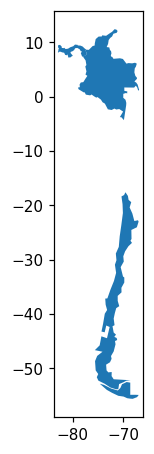

In [50]:
# Selección condicional compuesta con el operador "|" (OR bit a bit).
varios = world[(world['name']=='Colombia') |
              (world['name']=='Chile') |
              (world['name']=='Panama')]['geometry']
varios.plot();

Por supuesto, podríamos también utilizar los datos de otras columnas. Por ejemplo, países que tengan una población mayor a $100$ millones de personas:

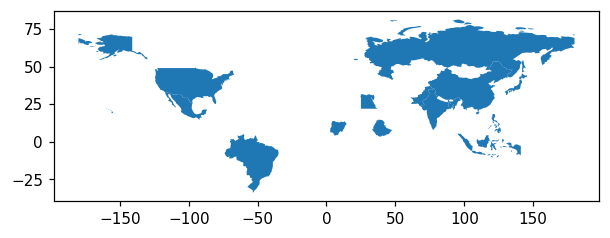

In [51]:
# Selección condicional con el valor de la variable 'pop_est'.
pob_alta = world[(world['pop_est']>100000000)]['geometry']
pob_alta.plot();

Adicionalmente, *GeoPandas* nos permite hacer una selección de índices basado en coordenadas con el atributo **`.cx`**. Primero, graficaremos nuevamente todo el mapa como referencia.

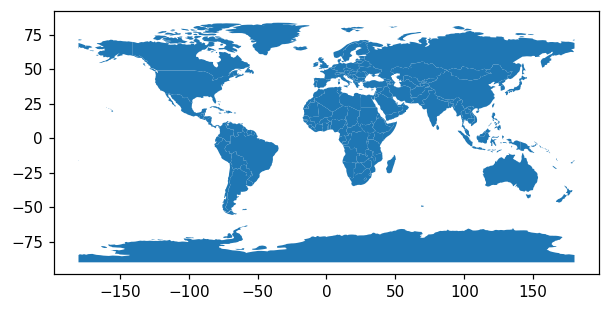

In [52]:
world.plot();

Ahora, creamos un nuevo *GeoDataFrame* correspondiente a los países ubicados en el hemisferio sur:

> * **Nota:** Este cálculo se realiza con base al sistema de [coordenadas geográficas](https://es.wikipedia.org/wiki/Coordenadas_geogr%C3%A1ficas). Estas se componen de los siguientes elementos:
  * **Latitud**: Ángulo entre $-90^\circ$ y $90^\circ$ con respecto al plano del ecuador (equivalente al eje $y$ en representaciones en 2D).
  * **Longitud**: Ángulo entre $-180^\circ$ y $180^\circ$ con respecto al meridiano de Greenwich (equivalente al eje $x$ en representaciones en 2D).

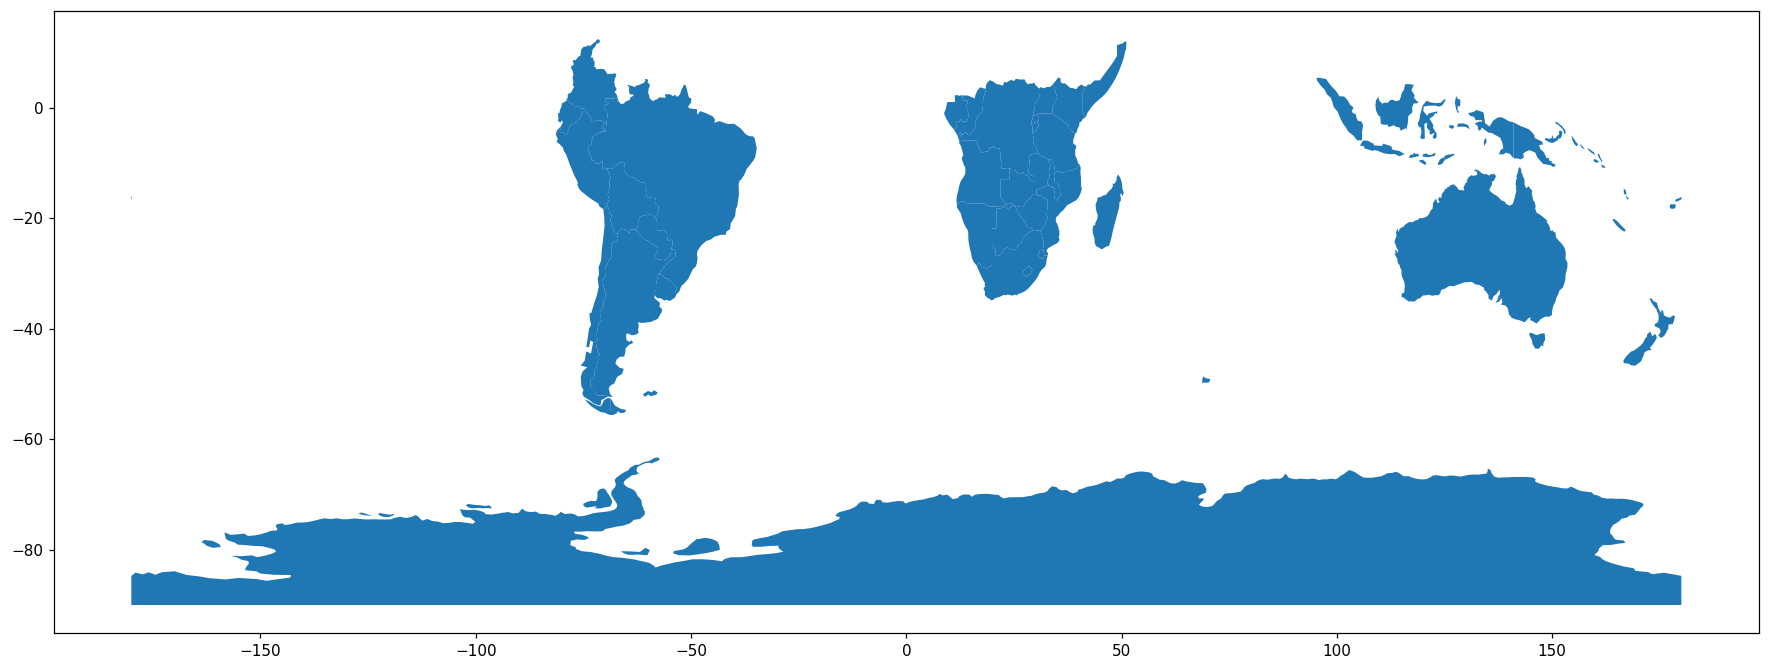

In [53]:
hemisferio_sur = world.cx[:, :0]
hemisferio_sur.plot(figsize=(20, 8));

Podríamos seleccionar las coordenadas correspondientes a Centro América, Sur América y el Caribe:

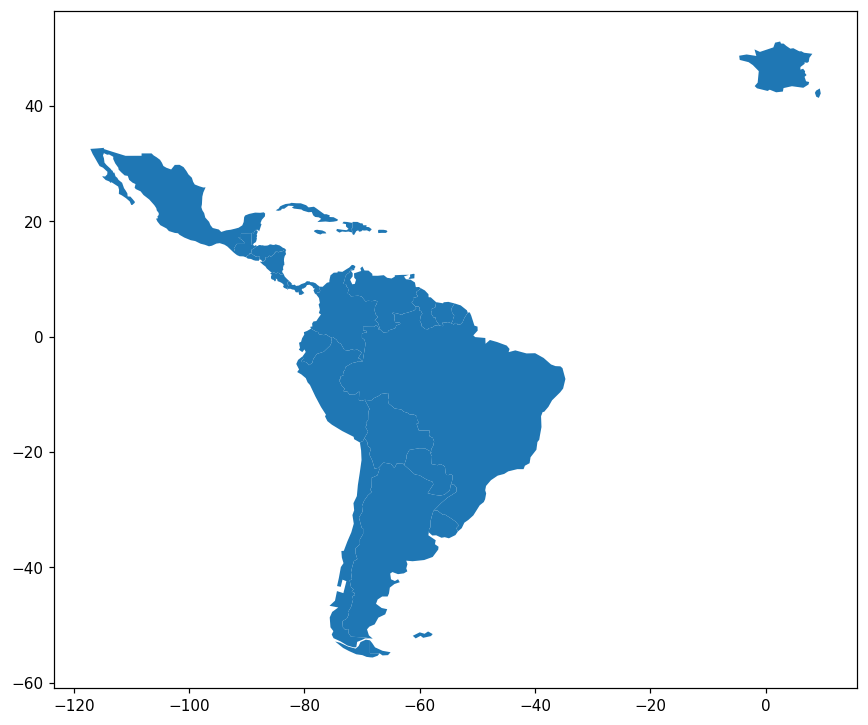

In [54]:
hemisferio_sur = world.cx[-120:-30, -60:20]
hemisferio_sur.plot(figsize=(20, 8));

Sin embargo, nótese que aparece también el mapa de Francia, ¿a qué se debe?

En este caso, el mapa de Francia está construido como un multi-polígono, incluyendo su división territorial ubicada en el continente europeo. Sin embargo, su geometría también incluye el polígono correspondiente a la Guyana Francesa ubicada en América del Sur.

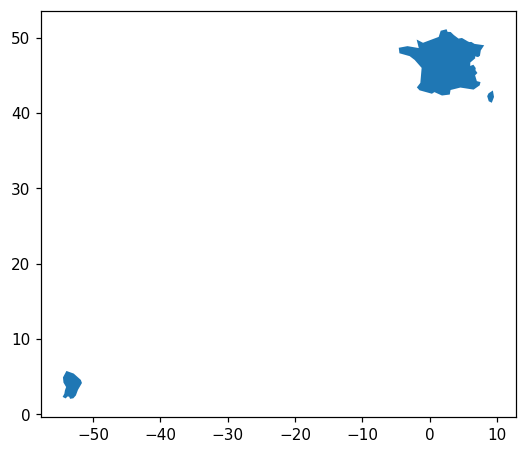

In [55]:
# Geometría de Francia, incluyendo a la Guyana Francesa.
world[world['name'] == 'France'].plot();

### **2.3. Columna `geometry`**
---

El nombre de la columna que contiene los polígonos a dibujar se puede obtener con el llamado al atributo **`name`** como se muestra en la siguiente línea de código.

Para este caso el nombre es igualmente **`geometry`**, pero podría ser diferente:

In [56]:
world.geometry.name

'geometry'

Es posible cambiar la columna que se usa para realizar el diagrama, para ello simplemente usamos la función **`set_geometry`** enviando el nombre de la columna que queremos usar. Para ejemplificar este proceso vamos a crear una nueva columna con datos geométricos llamada **`centroides`** la cual contendrá los **`centroid`** de cada polígono:

In [57]:
world['centroides'] = world.centroid
world.head()

C:\Users\santi\AppData\Local\Temp\ipykernel_14952\4003095241.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['centroides'] = world.centroid


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroides
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",POINT (163.85316 -17.31631)
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",POINT (34.75299 -6.25773)
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",POINT (-12.13783 24.29117)
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",POINT (-98.14238 61.46908)
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",POINT (-112.59944 45.70563)


Y ahora modificamos el valor **`geometry`** del *GeoDataFrame*, para establecerlo con el nombre de la columna recién creada:

In [58]:
world = world.set_geometry('centroides')

print(world.geometry.name) # El nombre usado por defecto para representar la geometría ha cambiado.

centroides


De esta manera, al diagramar nuevamente el *GeoDataFrame*, no se graficarán los polígonos. En cambio, se dibujarán los correspondientes **`centroides`** de cada fila.

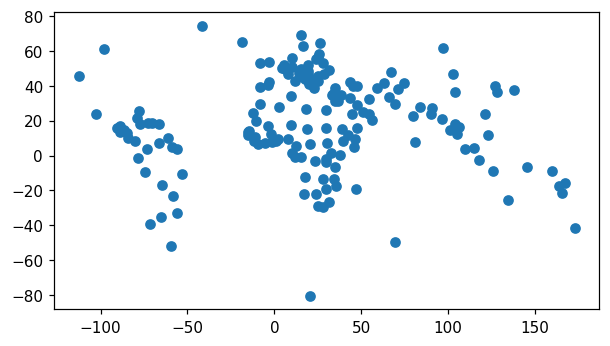

In [59]:
world.plot();

### **2.4. Personalizando mapas usando *Matplotlib***
---
**`GeoPandas`** pinta los mapas usando *Matplotlib* como soporte. Por lo tanto, se pueden manipular los detalles de estas figuras. Para empezar, carguemos de nuevo el *GeoDataFrame* de países del mundo.

In [60]:
# Recuperamos el dataset de países a su estado original.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\santi\AppData\Local\Temp\ipykernel_14952\504651133.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Cualquier atributo que se modifique en **`pyplot`**, o a partir de los objetos **`Axes`** y **`Figure`** de *Matplotlib* también se puede modificar en las gráficas generadas con el método **`.plot`** de *GeoPandas*. Por ejemplo:

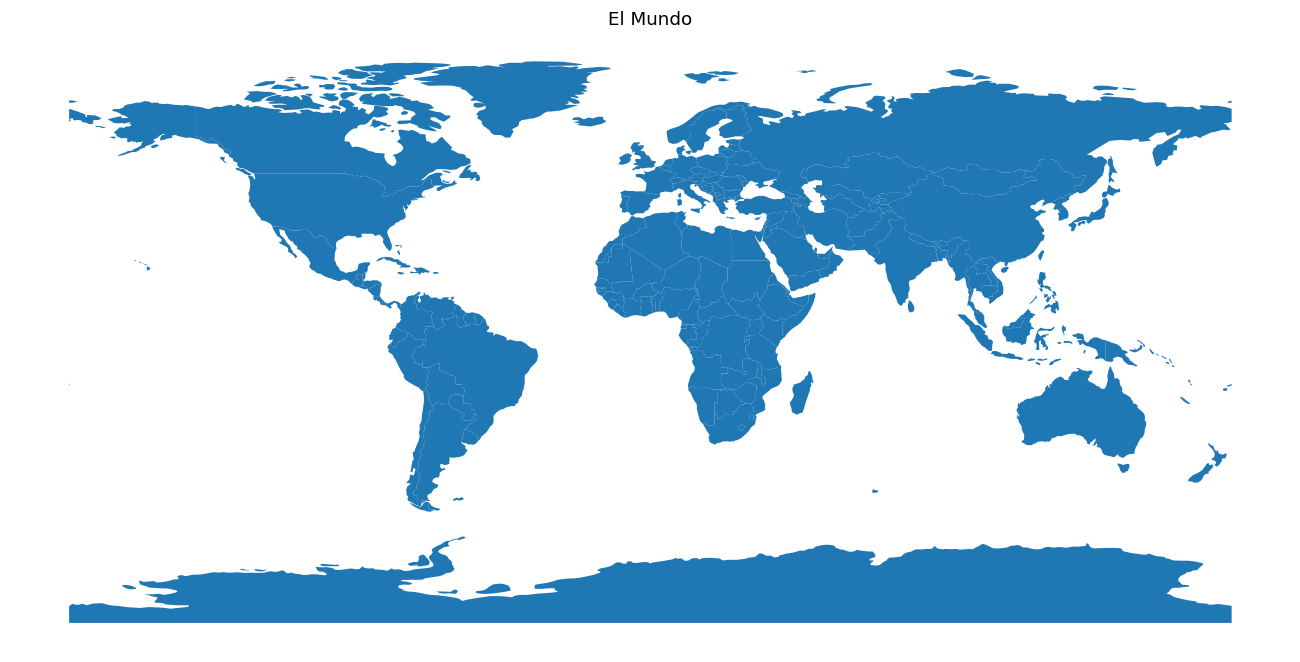

In [61]:
fig, ax = plt.subplots(1, figsize=(15, 10))   # Creamos la figura y el Axes de nuestra gráfica.
ax.set_title('El Mundo')                      # Cambiamos el título de la gráfica.
ax.set_axis_off()                             # Eliminamos los ejes

# Carga la configuración que hayamos generado en el elemento ax
world.plot(ax=ax);

## **3. Funcionalidades avanzadas de *GeoPandas***
---

En esta sección discutiremos algunas funcionalidades más avanzadas para la manipulación de los objetos de *GeoPandas*.

### **3.1. Agregación usando `dissolve`**
---
Es común que los datos geoespaciales que manejemos tengan un nivel de granularidad mayor del que necesitamos. Por ejemplo, podemos tener información de los municipios (ciudades) de un país, pero para nuestra tarea solo estamos interesados en realizar la agrupación y agregación de los datos por departamento (estado). En caso de trabajar con datos no espaciales, la función **`groupby`** se ajusta a las necesidades mencionadas. En cuanto a datos geoespaciales, **`GeoPandas`** provee una función que agrega características geométricas a través de la función **`dissolve`**.

El método **`dissolve`** funciona así:
1. Si dos polígonos conjuntos comparten un grupo (por ejemplo, están en el mismo departamento), ambos polígonos son fusionados en uno solo.
2. Los datos relacionados a cada polígono son agregados usando la función **`groupby.aggregate`**.

En el siguiente ejemplo combinaremos países para formar continentes.

Primero leemos nuevamente el GeoDataFrame, y lo modificamos para que sólo contenga las columnas **`continent`**, **`geometry`** y **`pop_est`**:

In [62]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry', 'pop_est']]
world.head(10)

C:\Users\santi\AppData\Local\Temp\ipykernel_14952\3428682463.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,continent,geometry,pop_est
0,Oceania,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",889953.0
1,Africa,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",58005463.0
2,Africa,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",603253.0
3,North America,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",37589262.0
4,North America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",328239523.0
5,Asia,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",18513930.0
6,Asia,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",33580650.0
7,Oceania,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",8776109.0
8,Asia,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",270625568.0
9,South America,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",44938712.0


Ahora usando la función **`dissolve`**, definimos la columna mediante la cual se hará la agregación y la función usada en la operación de agregación. Para este caso agruparemos de acuerdo con la columna **`continent`** y la función de agregación será **`sum`** (sumatoria):

In [63]:
continentes = world.dissolve(by='continent',  # Variable sobre la cual realizar la agrupación por categorías.
                             aggfunc='sum')   # Función de agregación para las variables no geométricas del GeoDataFrame.

El *GeoDataFrame* resultado de la agregación es el que se muestra a continuación, en donde se consolidan los valores de la columna **`pop_est`** por continente y también sus polígonos en la columna **`geometry`**:

In [64]:
continentes

,geometry,pop_est
continent,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",1.306370e+09
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",4.490000e+03
Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13...",4.550277e+09
Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...",7.454125e+08
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",5.837560e+08
Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456...",4.120487e+07
Seven seas (open ocean),"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",1.400000e+02
South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.23210...",4.270667e+08


Usando este nuevo *GeoDataFrame* podemos visualizar los continentes:

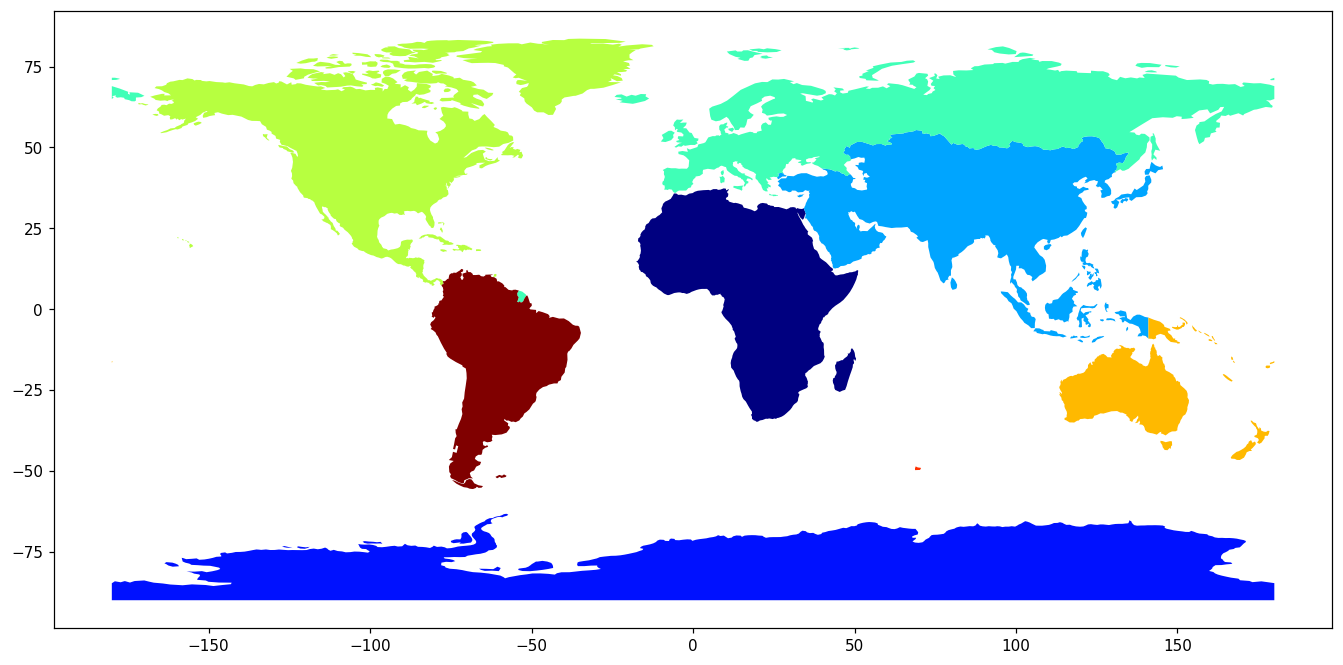

In [65]:
continentes.plot(cmap='jet', figsize = (15,13));

### **3.2. Otros *datasets* de ejemplo**
---

Podemos ver los **`GeoDataFrames`** que están disponibles en **`GeoPandas`** mediante el llamado al atributo **`gpd.datasets.available`**:

In [66]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

En la fecha de creación de este material se encuentran disponibles los *GeoDataFrames* **`naturalearth_cities`** (ciudades del mundo),  **`naturalearth_lowres`** (países del mundo) y **`nybb`** (*boroughs* en New York).

C:\Users\santi\AppData\Local\Temp\ipykernel_14952\591265145.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  new_york = gpd.read_file(gpd.datasets.get_path('nybb'))


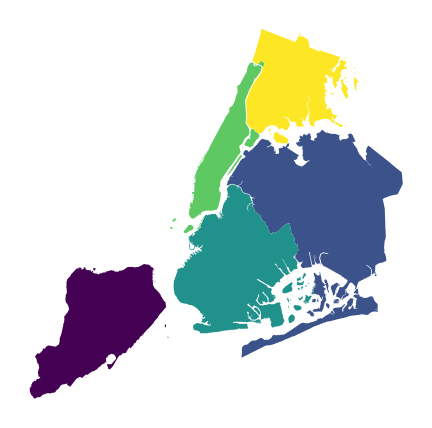

In [67]:
# Cargamos el dataset de ejemplo de los boroughs de la ciudad de Nueva York.
new_york = gpd.read_file(gpd.datasets.get_path('nybb'))

# Graficamos los distritos distinguiendolos por color.
ax = new_york.plot(cmap = 'viridis');
ax.axis('off');

### **3.3. Combinación de *GeoDataFrames***
---

Existen dos maneras de combinar conjuntos de datos en *GeoPandas*. **Uniones de atributos** y **uniones espaciales**:
* En una unión de atributos, un objeto **`GeoSeries`** o **`GeoDataFrame`** se combina con una *Series* o *DataFrame* de *Pandas* usando una variable en común. Esta operación es análoga a **`pd.merge`**. Sin embargo, si se hace usando el método de *pandas*, el resultado será un *DataFrame* y no un ***GeoDataFrame***.

* En una unión espacial, todas las observaciones (filas) de un objeto ***GeoSeries*** o ***GeoDataFrame*** son combinadas con base a una relación espacial establecida entre ellas.

Para conocer todos los detalles, consulte la [documentación oficial](http://geopandas.org/mergingdata.html).

A continuación, presentamos un ejemplo de una unión espacial. En el primer *GeoDataFrame* tenemos la información de las ciudades y en el segundo tenemos la información de los países. Usaremos una unión espacial para fusionar ambas fuentes de datos.

Inicialmente obtenemos los dos *GeoDataFrames*:

In [68]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ciudades = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

C:\Users\santi\AppData\Local\Temp\ipykernel_14952\434717488.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\santi\AppData\Local\Temp\ipykernel_14952\434717488.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  ciudades = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


In [69]:
ciudades.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


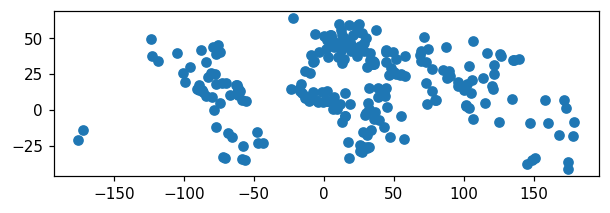

In [70]:
ciudades.plot();

Seleccionamos sólo las columnas que usaremos en el *GeoDataFrame* **`países`**, renombramos las columnas y fijamos la nueva columna **`geometry`**:

In [71]:
países = world[['geometry', 'name']]
países = países.rename(columns={'name':'país', 'geometry':'geometría_país'})
países = países.set_geometry('geometría_país')

El siguiente es el contenido resultante para los dos *GeoDataFrames*:

In [72]:
países.head()

,geometría_país,país
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America


In [73]:
ciudades.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


Observe que los 2 *GeoDataFrames* no poseen columnas comunes entre sí que nos permita combinarlos. Sin embargo, poseen información geoespacial que podría ser útil para realizar la combinación. La geometría de los países está dada por un polígono (o multi-polígono) y la geometría de las ciudades está dada por puntos distribuidos en el mismo plano.

Finalmente, vamos a realizar la **unión espacial** (**`sjoin`**) de los dos *GeoDataFrames* y ver el resultado:

In [74]:
ciudades_con_países = gpd.sjoin(ciudades,        # Primer GeoDataFrame.
                                países,          # Segundo GeoDataFrame.
                                how="inner",     # Tipo de unión. En este caso se utiliza la intersección.
                                op='within')     # Tipo de operación geométrica para determinar la relación. Se utiliza la contención de sus geometrías.
ciudades_con_países.head(30)

C:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,name,geometry,index_right,país
0,Vatican City,POINT (12.45339 41.90328),141,Italy
1,San Marino,POINT (12.44177 43.93610),141,Italy
226,Rome,POINT (12.48131 41.89790),141,Italy
2,Vaduz,POINT (9.51667 47.13372),114,Austria
212,Vienna,POINT (16.36469 48.20196),114,Austria
3,Lobamba,POINT (31.20000 -26.46667),73,eSwatini
16,Mbabane,POINT (31.13333 -26.31665),73,eSwatini
4,Luxembourg,POINT (6.13000 49.61166),128,Luxembourg
9,Bir Lehlou,POINT (-9.65252 26.11917),2,W. Sahara
10,Monaco,POINT (7.40691 43.73965),43,France


Nótese que la unión espacial fue capaz de identificar la mayoría de las ciudades dentro de sus países correspondientes. No obstante, en algunos casos el resultado no es correcto. Por ejemplo, *Vatican City* aparece dentro de *Italy*, pero el Vaticano es un país. Esto se debe a la baja resolución que estamos manejando para ambos conjuntos de datos.

> **IMPORTANTE**: El método **`gpd.sjoin`** también soporta varias funciones de unión aparte de **`within`**, como **`intersects`** y **`contains`**, mencionadas en la Sección **2.4. Pruebas de relación**.

### **3.4. Cargando datos georeferenciados**
---
El método **`GeoPandas.read_file`** permite la carga de conjuntos de datos a través de la librería **`fiona`**. ***Fiona*** soporta una gran cantidad de formatos, entre ellos [**GeoJSON**](https://es.wikipedia.org/wiki/GeoJSON), uno de los estándares más comunes para el almacenamiento de datos geoespaciales.

**`gpd.read_file`** regresa automáticamente un **`GeoDataFrame`** a partir de la lectura de un archivo. En el siguiente ejemplo leeremos un archivo **`json`** y mostrar su cabecera y el mapa.

**Mapa de Bogotá**
***

A continuación, haremos un ejemplo cargando el mapa de la ciudad de Bogotá a partir de un archivo *GeoJSON*. Estos datos fueron descargados originalmente del proyecto [UBER Movement](https://movement.uber.com/):

1. **IMPORTANTE:** antes de continuar, debe descargar el archivo desde el siguiente enlace: [**'bogota_cadastral.json'**](https://drive.google.com/uc?export=download&id=1_x7xpBGlsVpe5rWqHcOB_qBNW4DDjlU-). Después, cargue el archivo **`'bogota_cadastral.json'`** en el directorio de trabajo de *Google Colab*, o en el directorio actual si está trabajando en local. Tenga en cuenta que puede tardar un poco (ocupa 7.3 MB).

En *Google Colaboratory* puede realizar estos dos pasos automáticamente ejecutando la siguiente celda:

In [75]:
# Observe que la cadena "id=..." en la URL corresponde al ID del archivo de Drive que queremos descargar
!wget -q --no-check-certificate 'https://drive.google.com/uc?export=download&id=1_x7xpBGlsVpe5rWqHcOB_qBNW4DDjlU-' -O bogota_cadastral.json

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"id" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.



2. Cuando haya cargado el archivo en el sistema de archivos, ejecute la siguiente celda para crear el *GeoDataFrame*:


In [76]:
df_bogota = gpd.read_file('bogota_cadastral.json')

DriverError: bogota_cadastral.json: No such file or directory

In [ ]:
df_bogota.head()

Podemos identificar en este *GeoDataFrame*, la columna **`geometry`** que contiene los objetos a dibujar. También, podemos dibujar el *GeoDataFrame* de manera directa:

In [ ]:
df_bogota.geometry.name

In [ ]:
# Dibujamos la geometría de la ciudad de Bogotá.
df_bogota.plot(figsize = (20,10));

**Mapa de Colombia**
***

A continuación, cargaremos el mapa de Colombia con la división política a nivel de municipios y departamentos.


1. **IMPORTANTE:** antes de continuar, debe descargar el archivo desde el siguiente enlace: [**colombia.zip**](https://drive.google.com/uc?export=download&id=1wMwLcKZ0v18Dwse0Ln1-GTimFHpgSlir). Después, cargue el archivo **'colombia.zip'** en el directorio de trabajo de *Google Colab*, o en el directorio actual si está trabajando en local. Tenga en cuenta que puede tardar **unos minutos** (ocupa 48 MB). Si está trabajando en Google Colab, debe esperar a que se complete el indicador que aparece en la parte inferior izquierda de la pantalla.

Para hacer este proceso automáticamente, ejecute la siguiente celda:


In [ ]:
# Cargar archivo de datos geográficos de los municipios de Colombia.

# Primero necesitamos instalar la utilidad 'gdown' debido al tamaño del archivo:
!pip install --upgrade gdown

# Observe que la cadena "id=..." en la URL corresponde al ID del archivo de Drive que queremos descargar
!gdown https://drive.google.com/uc?id=1wMwLcKZ0v18Dwse0Ln1-GTimFHpgSlir


2. Cuando haya terminado de cargar el archivo, ejecute la siguiente instrucción para descomprimir el archivo:



In [ ]:
!unzip colombia.zip

3. Cuando haya descomprimido el archivo, ejecute la siguiente celda para crear los *GeoDataFrames*:

In [ ]:
col_mun = gpd.read_file(r"shapes/Limite Municipal.shp")       # Municipios
col_deps = gpd.read_file(r"shapes/Limite Departamental.shp")  # Departamentos

4. Mostramos las cabeceras de ambos *GeoDataFrames*:

In [ ]:
col_mun.head()

In [ ]:
col_deps.head()

5. Finalmente, visualizamos el mapa con los **municipios** y **departamentos** de Colombia:

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))       # Creamos la figura y el objeto Axes de Matplotlib.
ax.set_aspect('equal')                            # Definimos un relación de aspecto 1 a 1.
ax.set_axis_off();                                # Eliminamos los ejes de la gráfica.

# Municipios
col_mun.plot(cmap='CMRmap', linewidth=0.3,  ax=ax);

# Departamentos
col_deps.geometry.boundary.plot(linewidth=0.5,
                                color=None,            # Definimos una visualización de figuras sin color de relleno.
                                edgecolor='#444444',   # Color del borde gris oscuro.
                                ax=ax);

## **4. Mapas coropléticos con *GeoPandas***
---

Un **mapa coroplético** es un mapa en el cual las regiones se dibujan con diferentes tonos de color que van de acuerdo a cierta estadística representativa, como por ejemplo su población, rangos de ingreso, etc.

Para elaborar un mapa coroplético con *GeoPandas* y su método **`plot`**, basta con indicar la columna sobre la cual se van a clasificar los datos. De esta manera la gráfica generada presentará distintos tonos de color para cada región, acordes con los valores que se tienen en la columna indicada.

**Mapa coroplético del mundo: PIB per cápita**
***

Veamos un ejemplo con el mapa del mundo. Vamos a cargar el *dataset* de ejemplo y construiremos una nueva columna que llamaremos **`gdp_per_cap`** (producto interno bruto per cápita), la cual resulta de dividir el valor de la columna **`gdp_md_est`** (producto interno bruto nacional) entre el valor de la columna **`pop_est`** (población estimada):

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # Dataset de información geográfica mundial.
world = world[(world['pop_est']>0) & (world['name']!="Antarctica")] # Eliminamos Antártica al no tener habitantes.

# Creamos una nueva columna con el PIB per cápita.
world['gdp_per_cap'] = world['gdp_md_est'] / world['pop_est']

world.head()

Finalmente se crea el mapa coroplético con base en el valor de la nueva columna creada. Nótese que debemos configurar el parámetro **`column`** para decidir qué variable numérica representar con colores en el mapa coroplético:

In [ ]:
world.plot(column='gdp_per_cap', # Argumento 'column': Variable a representar en el mapa coroplético.
           cmap='YlOrRd',
           scheme='quantiles',   # Método para definir el esquema de color.
           figsize = (15,15));

El parámetro **`scheme`** permite afinar la forma cómo escalan los colores en el mapa, es decir, permite decidir qué tantos datos queremos mostrar para permitir que las personas puedan distinguir las diferencias entre colores. Este parámetro puede ser cualquiera de los siguientes:

```
 ‘box_plot’, ‘equal_interval’, ‘fisher_jenks’, ‘fisher_jenks_sampled’,
 headtail_breaks’, ‘jenks_caspall’, ‘jenks_caspall_forced’,
 ‘jenks_caspall_sampled’, ‘max_p_classifier’, ‘maximum_breaks’,
 ‘natural_breaks’, ‘quantiles’, ‘percentiles’, ‘std_mean’, ‘user_defined’
```

**Mapa coroplético del mundo: población mayor a 100 millones**
***

Nuevamente usando el *GeoDataFrame* mundial, vamos a poner todos los países en color gris y luego en color azul aquellos países que tienen una población mayor a los $100$ millones de personas.

In [ ]:
# Graficamos todos los países en gris.
ax = world.plot(color='lightgrey', linewidth=0.5,
                edgecolor='white', figsize=(15,5))

# Graficamos en azul los que cumplan la condición. Las figuras superponen a las creadas inicialmente.
world[world['pop_est']>100000000].plot(ax=ax, color='darkblue',
                                    linewidth=0.5, edgecolor='white',
                                    figsize=(15, 13));

**Mapa de Colombia: área de municipios**
***

Por último, con las formas del mapa de Colombia que cargamos anteriormente, crearemos un mapa coroplético para visualizar el área de los municipios (en Km$^2$).

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))       # Creamos la figura y el objeto Axes con Matplotlib.
ax.set_aspect('equal');
ax.set_axis_off();

col_mun.plot(column="AREA_KM",                    # Variable para representar en el mapa coroplético (área en kilómetros cuadrados).
             ax=ax,
             cmap='Blues', linewidth=0.3,
             scheme='fisher_jenks',
             legend=True,                         # Habilitamos la leyenda.
             legend_kwds={'loc': 'lower left'});  # Definimos la posición del recuadro de leyenda abajo a la izquierda.

col_deps.geometry.boundary.plot(linewidth=0.5, edgecolor='#444444',
                                color=None, ax=ax);

## **Recursos adicionales**
---
Los siguientes enlaces corresponden a sitios en donde encontrará información muy útil para profundizar en el conocimiento de las funcionalidades de la librería *GeoPandas*, empezando por su documentación oficial:

*  [Geopandas](https://geopandas.org/)
*  [The Shapely User Manual](https://shapely.readthedocs.io/en/latest/manual.html)
*  [Geopandas Example Gallery](https://geopandas.org/gallery/index.html)
*  [towardsdatascience - Geospatial adventures. Step 2: Pandas vs. GeoPandas](https://towardsdatascience.com/geospatial-adventures-step-2-pandas-vs-geopandas-16e842d0e3a7)



## **Créditos**
---

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistente docente:** Alberto Nicolai Romero Martínez

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*